<a href="https://colab.research.google.com/github/AnanyaJain3/Occluded_Facial_Realtime_Detection/blob/main/Collab_files/3_FaceRecognition_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
os.chdir('./drive/My Drive/Facial_detection/')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.1 MB/s eta 0:00:00


In [4]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

In [6]:
!pwd

/content/drive/My Drive/Facial_detection


In [7]:
import os


In [8]:
!pwd

/content/drive/My Drive/Facial_detection


See sample image

[[[148 146 146]
  [148 146 146]
  [148 146 146]
  ...
  [ 65  65  65]
  [ 65  65  65]
  [ 63  65  65]]

 [[148 146 146]
  [148 146 146]
  [148 146 146]
  ...
  [ 66  66  66]
  [ 65  65  65]
  [ 63  65  65]]

 [[148 146 146]
  [148 146 146]
  [148 146 146]
  ...
  [ 66  66  66]
  [ 66  66  66]
  [ 63  65  65]]

 ...

 [[ 95  97  97]
  [ 95  97  97]
  [ 95  97  97]
  ...
  [ 52  52  52]
  [ 52  52  52]
  [ 48  50  50]]

 [[ 94  96  96]
  [ 94  96  96]
  [ 94  96  96]
  ...
  [ 52  52  52]
  [ 51  51  51]
  [ 48  50  50]]

 [[ 93  95  95]
  [ 93  95  95]
  [ 93  95  95]
  ...
  [ 49  51  51]
  [ 48  50  50]
  [ 48  50  50]]]


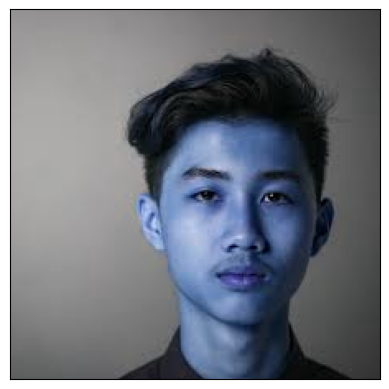

(225, 225, 3)


In [9]:

img = cv2.imread('images.jpeg')
print(img)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

In [10]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array


1/1 [==============================] - 0s 214ms/step


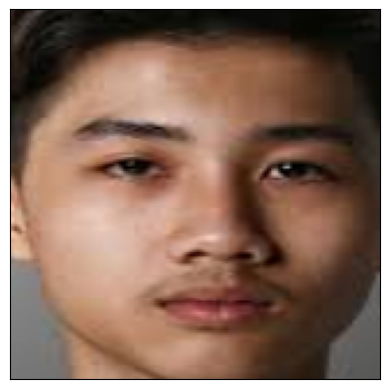

(225, 225, 3)


In [13]:
# load the photo and extract the face
pixels = extract_face('images.jpeg')
plt.imshow(pixels)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)



Apply extract_face() for all faces in the dataset

In [24]:
"""
import os
import cv2
import numpy as np

def load_face(dir):
    faces = list()
    for filename in os.listdir(dir):
        path = os.path.join(dir, filename)
        if os.path.isfile(path) and path.lower().endswith(('.jpg', '.jpeg', '.png')):
            image = cv2.imread(path)
            if image is not None:
                faces.append(image)
    return faces

def load_dataset(dir):
    X, y = list(), list()
    for subdir in os.listdir(dir):
        try:
            path = os.path.join(dir, subdir)
            if os.path.isdir(path):  # Check if it's a directory
                faces = load_face(path)
                labels = [subdir for i in range(len(faces))]
                print("Loaded %d samples for class: %s" % (len(faces), subdir))
                X.extend(faces)
                y.extend(labels)
        except IndexError:
            print("Index Error")
            print(subdir)
            continue

    return np.array(X), np.array(y)

# Load the train dataset
trainX, trainy = load_dataset('./Facial Detection FULL DATASET/train/')
print(trainX.shape, trainy.shape)

# Load the test dataset
testX, testy = load_dataset('./Facial Detection FULL DATASET/valid/')
print(testX.shape, testy.shape)

np.savez_compressed('5-faces-dataset.npz', trainX, trainy, testX, testy)

import os
import cv2
import numpy as np

def load_face(dir):
    faces = list()
    # Enumerate files
    for filename in os.listdir(dir):
        path = os.path.join(dir, filename)  # Use os.path.join to create the full path
        if path.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Load the image using OpenCV or any other image library
            image = cv2.imread(path)
            if image is not None:
                faces.append(image)
    return faces

def load_dataset(dir):
    X, y = list(), list()
    for subdir in os.listdir(dir):
        try:
            path = os.path.join(dir, subdir)  # Use os.path.join to create the full path
            faces = load_face(path)
            labels = [subdir for i in range(len(faces))]
            print("Loaded %d samples for class: %s" % (len(faces), subdir))
            X.extend(faces)
            y.extend(labels)
        except IndexError:
            print("Index Error")
            print(subdir)
            continue

    return np.array(X), np.array(y)

# Load the train dataset
trainX, trainy = load_dataset('./Facial Detection FULL DATASET/train/')
print(trainX.shape, trainy.shape)

# Load the test dataset
testX, testy = load_dataset('./Facial Detection FULL DATASET/valid/')
print(testX.shape, testy.shape)

# Save and compress the dataset for further use
np.savez_compressed('5-faces-dataset.npz', trainX, trainy, testX, testy)

"""


def load_face(dir):

  faces = list()
  # enumerate files
  for filename in os.listdir(dir):
      path = dir + filename
      print(path)
      face = extract_face(path)
      faces.append(face)
  return faces

def load_dataset(dir):
    count =0

    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
      try:
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
        #print(faces.shape)

      except IndexError:
        print("Index Error")
        print(subdir)
        count=count+1
        print(count)
      continue

    return np.asarray(X), np.asarray(y)

# load train dataset
trainX, trainy = load_dataset('./archive-2/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('./archive-2/val/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('5-faces-dataset.npz', trainX, trainy, testX, testy)


./archive-2/train/jerry_seinfeld/httpikinjaimgcomgawkermediaimageuploadsWmIuhdsrcedidjpgjpg.jpg
1/1 [==============================] - 0s 248ms/step
./archive-2/train/jerry_seinfeld/httpimagesrottentomatoescomimagesspotlightsnewsjerryseinfeldjpg.jpg
1/1 [==============================] - 0s 207ms/step
./archive-2/train/jerry_seinfeld/httpsrobertaccetturacomwpcontentuploadsjerryseinfeldheadshotjpg.jpg
1/1 [==============================] - 0s 161ms/step
./archive-2/train/jerry_seinfeld/httppfodcompchannelslegacyprofilejerryseinfeldpodcastjpg.jpg
1/1 [==============================] - 0s 130ms/step
./archive-2/train/jerry_seinfeld/httpwwwwatchidcomsitesdefaultfilesuploadsightingBreitlingwatchJerrySeinfeldjpg.jpg
1/1 [==============================] - 0s 146ms/step
./archive-2/train/jerry_seinfeld/httpstatictherichestimagescomcdncwpcontentuploadsJerrySeinfeldjpg.jpg
1/1 [==============================] - 0s 127ms/step
./archive-2/train/jerry_seinfeld/httpgraphicsnytimescomimagessectionmov

In [25]:
# load the face dataset
data = np.load('5-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)


In [35]:
# load the facenet model

!pip install keras-facenet
from keras_facenet import FaceNet


facenet_model = FaceNet()
print('Loaded Model')

Loaded Model


Standardizing the faces and extracting a embedding vector using the model

In [38]:
def get_embedding(MyFaceNet, face):
    # scale pixel values

    # standardization

    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    print("sample",sample)
    # make prediction to get embedding
    yhat = MyFaceNet.embeddings(sample)

    return yhat[0]

# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)

emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('5-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

Streaming output truncated to the last 5000 lines.
   [250 250 250]
   ...
   [ 35  36  31]
   [ 36  36  32]
   [ 37  36  32]]

  [[250 250 250]
   [250 250 250]
   [250 250 250]
   ...
   [ 41  41  36]
   [ 38  38  34]
   [ 37  36  33]]

  [[250 250 250]
   [250 250 250]
   [249 250 250]
   ...
   [ 44  42  39]
   [ 40  40  36]
   [ 39  38  35]]

  ...

  [[250 250 250]
   [250 250 250]
   [250 250 250]
   ...
   [253 254 254]
   [255 255 255]
   [253 254 254]]

  [[250 250 250]
   [250 250 250]
   [250 250 250]
   ...
   [199 200 201]
   [239 240 240]
   [255 255 255]]

  [[249 249 251]
   [249 249 251]
   [250 250 250]
   ...
   [131 132 134]
   [218 218 219]
   [255 255 255]]]]
1/1 [==============================] - 0s 34ms/step
sample [[[[ 39  12  11]
   [ 38  12  11]
   [ 35  11  11]
   ...
   [ 63  28  15]
   [ 68  28  11]
   [ 69  28  10]]

  [[ 39  13  11]
   [ 38  13  11]
   [ 35  12  11]
   ...
   [ 61  28  16]
   [ 66  28  12]
   [ 67  28  11]]

  [[ 37  15  13]
   [ 37  15

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=93, test=25
Accuracy: train=100.000, test=100.000


Randomly select a face from test set for prediction. Calculate confidence

Predicted: 
['ben_afflek' 'elton_john'] 
[ 2.70892954 89.01705568  1.95563966  2.25790508  4.06047003]
Expected: elton_john


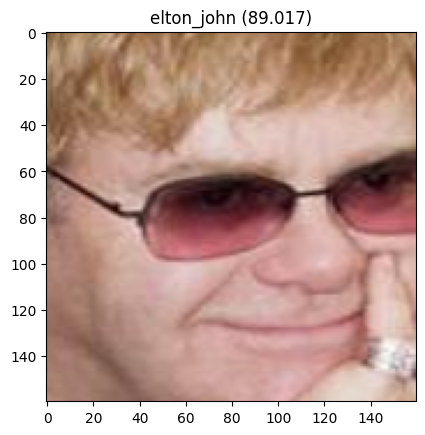

In [40]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()